In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import sys
import time
import datetime as dt
import pandas as pd
import geopandas as gpd
import scipy as sp
from scipy import signal
from tqdm.notebook import tqdm
import rasterio as rio
from shapely.geometry import Point, LineString, Polygon, MultiPoint
import fiona
from shapely.ops import nearest_points
from rasterio.windows import Window
import string
import matplotlib.gridspec as gridspec
from scipy.spatial import Delaunay
from scipy.interpolate import LinearNDInterpolator

In [2]:
1+1

2

In [3]:
gpr = gpd.read_file('/Volumes/arc_04/FIELD_DATA/K8621920/RES/PROCESSED_LINES/picked_bed.shp')
gpr = gpr[gpr.camp=='KIS2'].copy()
cross_channel_lines = ['line7p75','line7p5','line7p25','line7', 'line6','line5','lineAPREScross','line4','line3','line2','line1','line0','line8']
for line_name in gpr.line_name.unique():
    if line_name not in cross_channel_lines:
        i_names = gpr[gpr.line_name == line_name].index
        gpr.drop(i_names,inplace=True)

In [4]:
gpr.keys()

Index(['CDP', 'x', 'y', 'DELAY', 'line_name', 'surf', 'SEQnum', 'camp',
       'time_UTC', 'ice_thickn', 'bed', 'geometry'],
      dtype='object')

In [22]:
points = np.array(list(zip(gpr.x,gpr.y
                          # ,gpr.bed
                          )))

In [23]:
points

array([[-382122.3, -726559.8],
       [-382120.9, -726557.7],
       [-382118.5, -726554.6],
       ...,
       [-380485.3, -728127.9],
       [-380487.6, -728130.1],
       [-380489.3, -728131.8]])

In [63]:
tri = Delaunay(points[::25])

In [64]:
interp =LinearNDInterpolator(tri,gpr.bed.to_numpy()[::25])

In [65]:
xmin, xmax, ymin, ymax = -382700, -374781.9, -734075.1, -721770.2

In [66]:
xs = np.linspace(xmin, xmax,1000)
ys = np.linspace(ymin, ymax,1000)
xx, yy = np.meshgrid(xs, ys) 

In [67]:
z = interp(xx,yy)

In [68]:
z.shape

(1000, 1000)

In [69]:
extent = [xmin, xmax, ymin, ymax ]

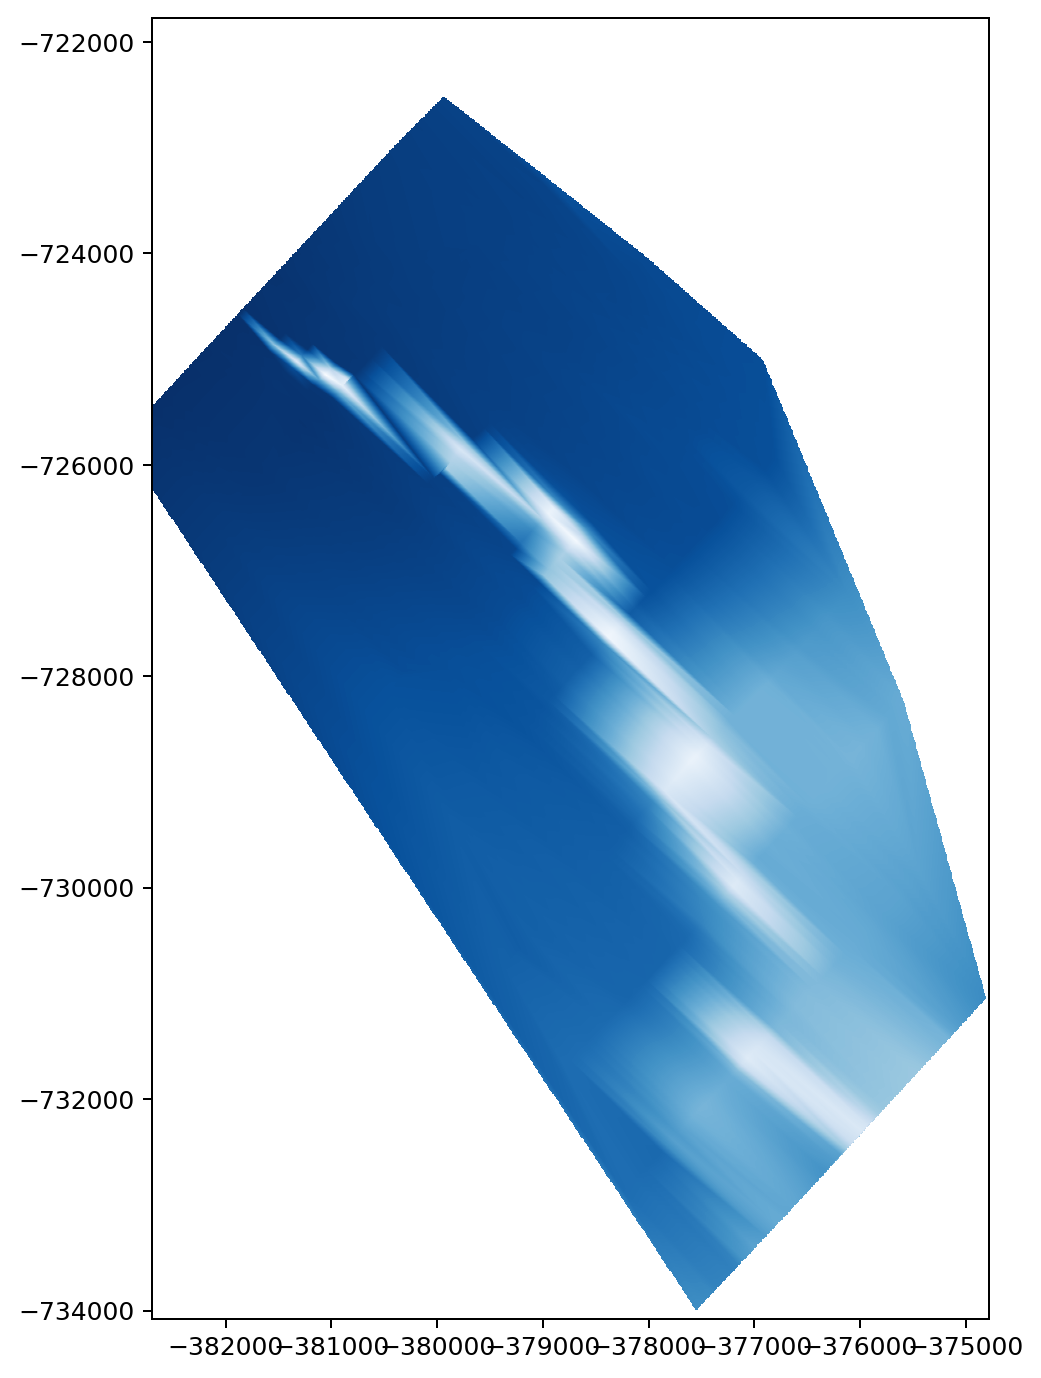

In [72]:
plt.figure(figsize=[6,10],dpi=180)
plt.imshow(np.flipud(z),extent=extent,cmap='Blues_r')
plt.show()

In [24]:
tri.simplices

array([[ 6814,  2330,  3717,  2328],
       [ 2326,  2329,  2330,  2328],
       [ 6823,  2330,  2334,  4312],
       ...,
       [ 5486,  5493,  6238,  6237],
       [12942, 12936, 12939, 12938],
       [12942, 12936, 12937, 12938]], dtype=int32)

In [ ]:
# or try contour to raster
# https://www.hatarilabs.com/ih-en/how-to-create-an-elevation-raster-from-contour-lines-with-python-geopandas-numpy-and-gdal-tutorial